# **05_PredictingAsthma**

## Objectives

* Fit and evaluate a classification model to predict whether a patient will have asthma, or not.

## Inputs

* Raw data generated from "01_DataCollection". Saved as: inputs\datasets\raw\asthma_disease_data.csv
* Confirmation of transformations and required scaling for continuous / numerical features from 04_FeatureEngineering; no additional data cleaning was required as no missing data.

## Outputs

* Data cleaning and Feature Engineering pipeline
* Modeling pipeline

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/AsthmaBurden/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/AsthmaBurden'

---

# Pipeline with all features 

## Step one: Load data
Collection dataset was loaded and the target feature (Diagnosis) was assigned 

In [12]:
import pandas as pd

df = (
    pd.read_csv("outputs/datasets/collection/asthma_disease_data.csv").drop(['DoctorInCharge', 'PatientID'], axis=1)
)


target_var = "Diagnosis"

df.head(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0


## Step two: Data Exploration
Update Age, Ethnicity and Education to align with 03_DataExploration:

In [7]:
df_updated = df.copy()

# Convert Age to float
df_updated['Age'] = df_updated['Age'].astype(float)

# Collapse Ethnicity codes
df_updated['Ethnicity'] = df_updated['Ethnicity'].replace({
    0: 0,  # White
    1: 1,  # African American → Other
    2: 1,  # Asian → Other
    3: 1   # Other → Other
})

# Collapse EducationLevel codes
df_updated['EducationLevel'] = df_updated['EducationLevel'].replace({
    1: 1,  # Bachelor/Higher → 1
    2: 1,  # Bachelor/Higher → 1
    3: 0   # None/High school → 0
})

# Ipdate encoding maps
encoding_maps_updated = {
    'Ethnicity': {0: "White", 1: "Other"},
    'EducationLevel': {0: "None/High School", 1: "Bachelor/Higher"}
}

df_updated.head(10)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63.0,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26.0,1,1,1,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57.0,0,1,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40.0,1,1,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61.0,0,0,0,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0
5,21.0,0,1,0,21.812975,0,0.470044,1.759118,9.549262,1.711446,...,0,2.328191,5.898515,1,0,1,0,0,1,0
6,45.0,1,1,1,30.245954,1,9.371784,7.030507,5.746128,7.664306,...,0,2.995100,1.701512,1,1,1,0,0,0,0
7,26.0,0,0,1,26.048416,1,8.344096,1.626484,6.431179,6.939046,...,0,2.069343,4.012260,1,0,0,1,1,1,0
8,49.0,1,1,1,32.676204,0,2.690256,3.920034,5.843645,3.180421,...,1,1.761242,5.190931,1,1,1,1,0,0,0
9,45.0,1,1,1,29.910298,0,2.895720,2.607700,7.234908,1.711722,...,0,2.848420,5.771022,1,0,0,0,1,1,0


## Step three: Feature Engineering
Apply relevant learnings from 03_FeatureEngineering with regards to continuous features; reminder that no features were highly correlated (SmartCorrelatedSelection) and categorical features were already binary:

In [8]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

# Feature Engineering
def PipelineDataCleaningAndFeatureEngineering():
    """
    Custom function to apply transformations required.
    Yeo-Johnson transformation selected as the best option in feature engineering"""
    pipeline_base = Pipeline([
        ('yeojohnson_transform', SklearnTransformerWrapper(
        transformer=PowerTransformer(method='yeo-johnson'),
        variables=['BMI',
            'LungFunctionFEV1', 'LungFunctionFVC',
            'SleepQuality'])
        )
    ])

    return pipeline_base


PipelineDataCleaningAndFeatureEngineering()

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('yeojohnson_transform', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,transformer,PowerTransformer()
,variables,"['BMI', 'LungFunctionFEV1', ...]"
,"method method: {'yeo-johnson', 'box-cox'}, default='yeo-johnson'The power transform method. Available methods are:- 'yeo-johnson' [1]_, works with positive and negative values- 'box-cox' [2]_, only works with strictly positive values",'yeo-johnson'
,"standardize standardize: bool, default=TrueSet to True to apply zero-mean, unit-variance normalization to thetransformed output.",True
,"copy copy: bool, default=TrueSet to False to perform inplace computation during transformation.",True


## Step four: Feature engineering [continued]
Apply feature scaling for continuous features and run pipeline for hyperparameter optimisation (taken from the Code Institutes "Churnometer" walkthrough project):

In [11]:
# Feat Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 

# Feat Selection
from sklearn.feature_selection import SelectFromModel

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier


def PipelineClf(model):
    """
    Create a machine learning pipeline for classification or regression tasks.
    Standardizes features using StandardScaler.
    Selects important features based on the provided model using SelectFromModel.
    Fits the provided model on the selected features.
    """
    # ColumnTransformer to scale only float columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('scaler', StandardScaler(), selector(dtype_include='float'))
        ],
        remainder='passthrough'  # leave other columns untouched
    )

    pipeline_base = Pipeline([
        ("preprocessing", preprocessor),
        ("feat_selection", SelectFromModel(model)),
        ("model", model),
    ])

    return pipeline_base

## Step five: Split the train and test set
Split the datasets with all features present

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop([target_var], axis=1),
    df[target_var],
    test_size=0.2,
    random_state=0,
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1913, 26) (1913,) (479, 26) (479,)


## Step six: Handle target imbalance
As mentioned previously, the dataset is heavily imbalanced, with only a small pool for analyses.

Part a) Apply transformations tot he train and test dataset

In [24]:
pipeline_data_cleaning_feat_eng = PipelineDataCleaningAndFeatureEngineering()
X_train = pipeline_data_cleaning_feat_eng.fit_transform(X_train)
X_test = pipeline_data_cleaning_feat_eng.transform(X_test)

Part b) Visualise the train dataset target distribution

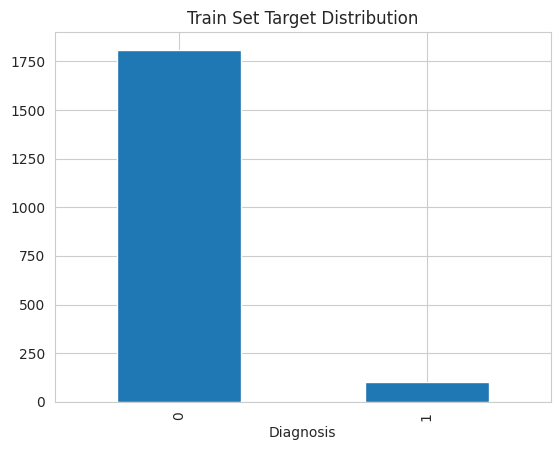

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
y_train.value_counts().plot(kind='bar', title='Train Set Target Distribution')
plt.show()

Part c) Apply Synthetic Minority Oversampling technique to balance the train set target feature:

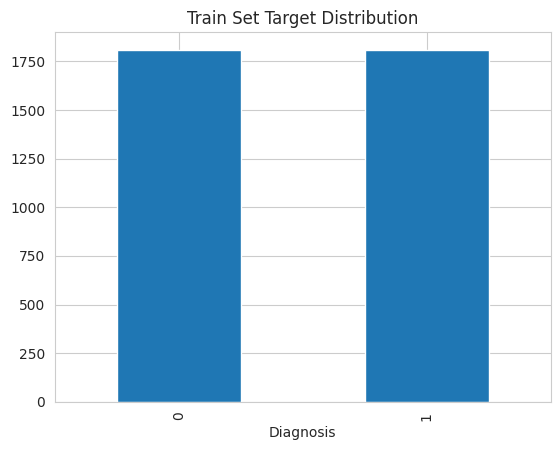

In [23]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='minority', random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)

y_train.value_counts().plot(kind='bar',title='Train Set Target Distribution')
plt.show()

## Step six: Grid Search CV - Sklearn


---

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
